In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 
import numpy as np
import missingno

In [165]:
data = pd.read_csv('data/Churn_Modelling.csv')

In [166]:
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [167]:
print('There are '+str(len(data.columns))+'columns which are\n'+str(list(data.columns)) )

There are 14columns which are
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [168]:
print('Numerical columns in the dataset are:')
print(list(data.select_dtypes(include=int).columns))

Numerical columns in the dataset are:
['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']


In [169]:
print('String type columns in the dataset are:')
print(data.select_dtypes(include =object).columns)

String type columns in the dataset are:
Index(['Surname', 'Geography', 'Gender'], dtype='object')


In [170]:
print('Number of Unique values in each numerical column:')
for i in list(data.select_dtypes(include=int).columns):
    print(str(i)+': '+str(data[i].nunique()))

Number of Unique values in each numerical column:
RowNumber: 10000
CustomerId: 10000
CreditScore: 460
Age: 70
Tenure: 11
NumOfProducts: 4
HasCrCard: 2
IsActiveMember: 2
Exited: 2


In [171]:
print('Number of unique values in each categorical column:')
for i in list(data.select_dtypes(include =object).columns):
    print(str(i)+': '+str(data[i].nunique()))

Number of unique values in each categorical column:
Surname: 2932
Geography: 3
Gender: 2


# Missing And Duplicate Data in the Dataset

In [172]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [173]:
data.duplicated().sum()

0

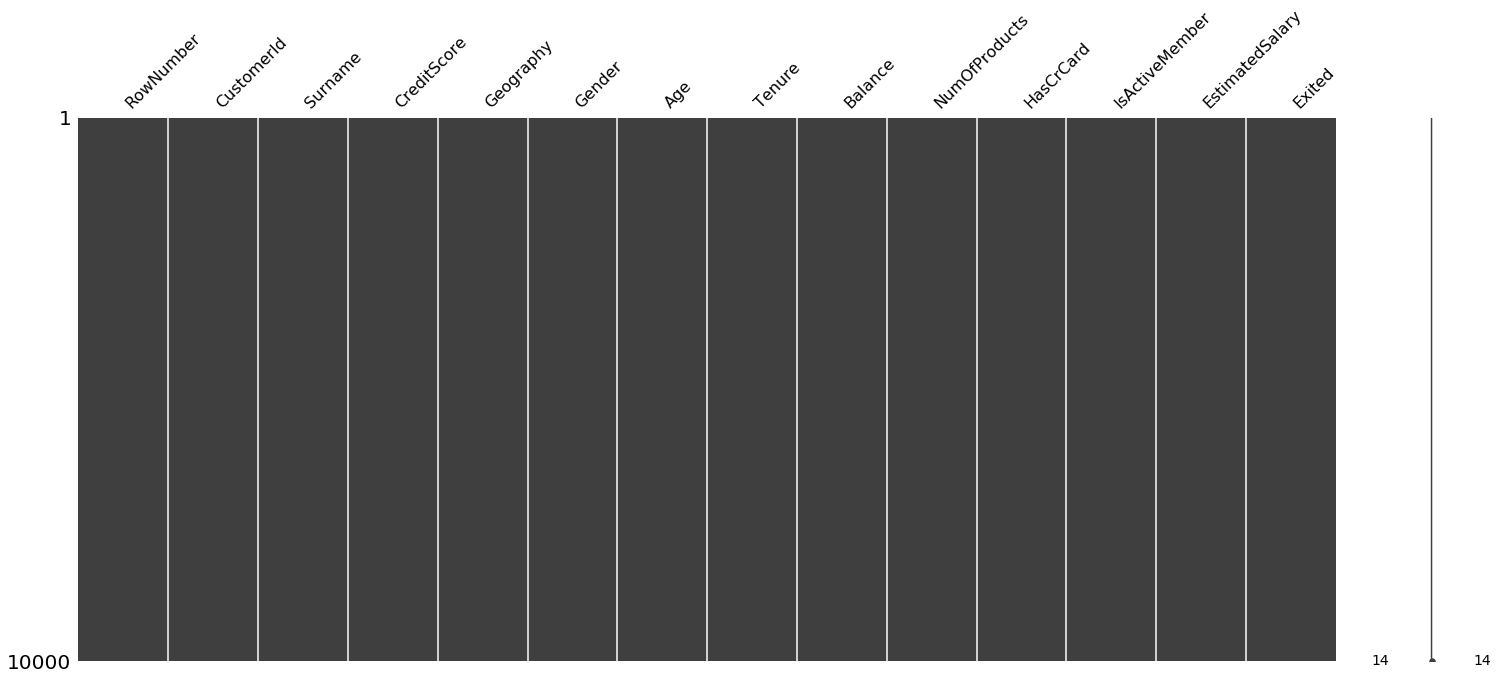

In [174]:
missingno.matrix(data)

# Univariate Analysis of Variables

Text(0, 0.5, 'Number of Records')

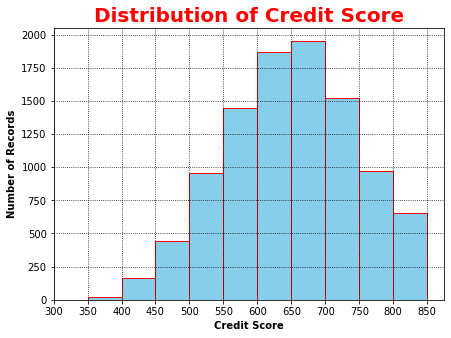

In [175]:
plt.figure(figsize=(7,5))
plt.hist(data['CreditScore'],color='skyblue',edgecolor='red')
plt.xticks(range(300,900,50))
plt.grid(ls=':',color = 'black')
plt.title('Distribution of Credit Score',weight='bold',fontsize=20,color='red')
plt.xlabel('Credit Score',weight='bold',color='black',fontsize=10)
plt.ylabel('Number of Records',weight = 'bold',color='black',fontsize=10)

Text(0, 0.5, 'Number of Records')

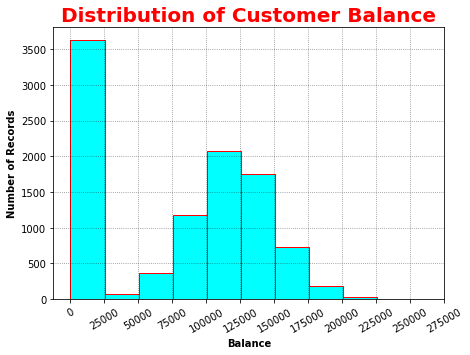

In [176]:
plt.figure(figsize=(7,5))
plt.hist(data['Balance'],color='cyan',edgecolor='red')
plt.xticks(range(0,300000,25000),rotation=30)
plt.grid(ls=':',color = 'black',alpha=0.5)
plt.title('Distribution of Customer Balance',weight='bold',fontsize=20,color='red')
plt.xlabel('Balance',weight='bold',color='black',fontsize=10)
plt.ylabel('Number of Records',weight = 'bold',color='black',fontsize=10)

Text(0, 0.5, 'Number of Records')

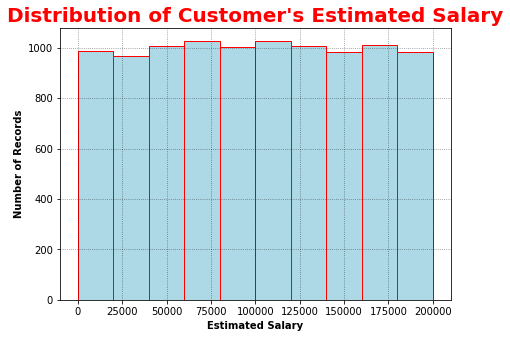

In [177]:
plt.figure(figsize=(7,5))
plt.hist(data['EstimatedSalary'],color='lightblue',edgecolor='red')
plt.grid(ls=':',color = 'black',alpha=0.5)
plt.title('Distribution of Customer\'s Estimated Salary',weight='bold',fontsize=20,color='red')
plt.xlabel('Estimated Salary',weight='bold',color='black',fontsize=10)
plt.ylabel('Number of Records',weight = 'bold',color='black',fontsize=10)

Text(0, 0.5, 'Number of Records')

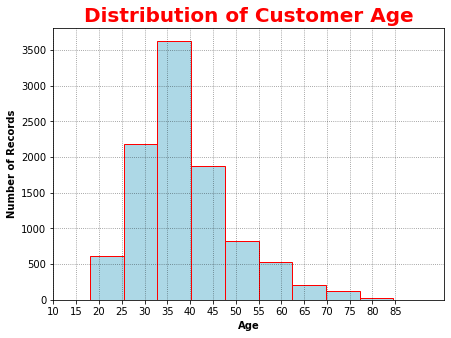

In [178]:
plt.figure(figsize=(7,5))
plt.hist(data['Age'],color='lightblue',edgecolor='red')
plt.xticks(range(10,90,5))
plt.grid(ls=':',color = 'black',alpha=0.5)
plt.title('Distribution of Customer Age',weight='bold',fontsize=20,color='red')
plt.xlabel('Age',weight='bold',color='black',fontsize=10)
plt.ylabel('Number of Records',weight = 'bold',color='black',fontsize=10)

Text(0, 0.5, 'Number of Records')

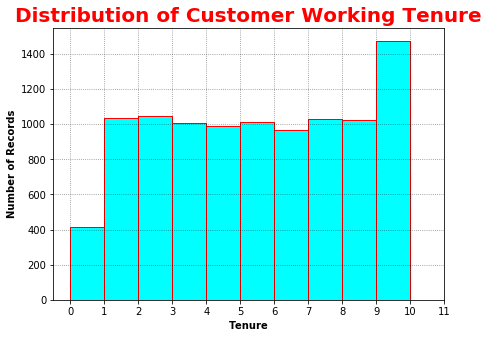

In [179]:
plt.figure(figsize=(7,5))
plt.hist(data['Tenure'],color='cyan',edgecolor='red')
plt.xticks(range(0,12,1))
plt.grid(ls=':',color = 'black',alpha=0.5)
plt.title('Distribution of Customer Working Tenure',weight='bold',fontsize=20,color='red')
plt.xlabel('Tenure',weight='bold',color='black',fontsize=10)
plt.ylabel('Number of Records',weight = 'bold',color='black',fontsize=10)

Text(0, 0.5, 'Number of Records')

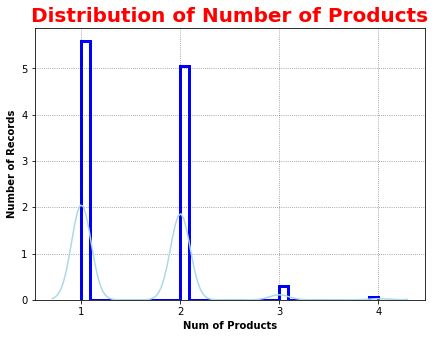

In [180]:
plt.figure(figsize=(7,5))
sns.distplot(data['NumOfProducts'],color='lightblue',hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "blue"})
plt.xticks(range(1,5,1))
plt.grid(ls=':',color = 'black',alpha=0.5)
plt.title('Distribution of Number of Products',weight='bold',fontsize=20,color='red')
plt.xlabel('Num of Products',weight='bold',color='black',fontsize=10)
plt.ylabel('Number of Records',weight = 'bold',color='black',fontsize=10)

(array([5014.,    0.,    0.,    0.,    0., 2477.,    0.,    0.,    0.,
       2509.]), array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]), <a list of 10 Patch objects>)


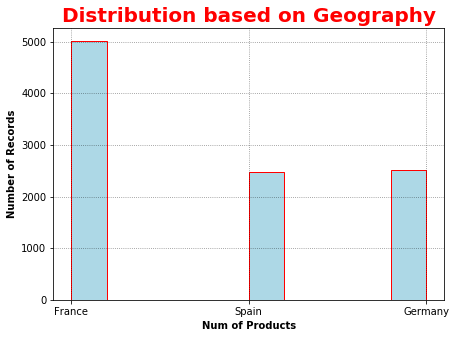

In [181]:
plt.figure(figsize=(7,5))
ax = plt.hist(data['Geography'],color='lightblue',edgecolor='red')
#plt.xticks(range(1,5,1))
plt.grid(ls=':',color = 'black',alpha=0.5)
plt.title('Distribution based on Geography',weight='bold',fontsize=20,color='red')
plt.xlabel('Num of Products',weight='bold',color='black',fontsize=10)
plt.ylabel('Number of Records',weight = 'bold',color='black',fontsize=10)
print(ax)

Text(0, 0.5, 'HasCrCard')

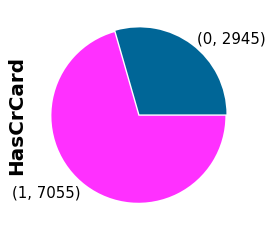

In [182]:
colors = ['#006697','#ff30ff']
size = [10,10]
sums = data.groupby('HasCrCard').count()['CustomerId']
sums.name  = 'HasCrCard'
label = list(zip(sums.index.tolist(),sums.tolist()))
sums.plot(kind='pie',labels=label,colors = colors,explode=[0.01,0.01],fontsize =15)
plt.ylabel('HasCrCard',fontsize=20,color='black',weight='bold')

Text(0, 0.5, 'IsActiveMember')

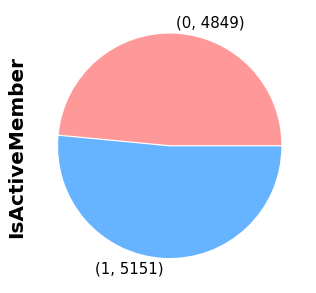

In [183]:
colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(5,7))
dist = data.groupby('IsActiveMember').count()['CustomerId']
dist.name = 'IsActiveMember'
lab = list(zip(dist.index.tolist(),dist.tolist()))
dist.plot(kind='pie',labels=lab,colors=colors,explode=[0.01,0.001],fontsize=15)
plt.ylabel('IsActiveMember',fontsize=20,color='black',weight='bold')

Text(0, 0.5, '')

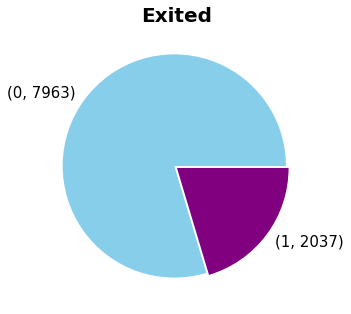

In [184]:
plt.figure(figsize=(5,7))
exi = data.groupby('Exited').count()['CustomerId']
lab=list(zip(exi.index.tolist(),exi.tolist()))
exi.plot(kind='pie',colors=['skyblue','purple'],explode=[0.02,0.01],labels=lab,fontsize=15)
plt.title('Exited',fontsize=20,weight='bold')
plt.ylabel('')

Text(0.5, 1.0, 'Productwise Distribution')

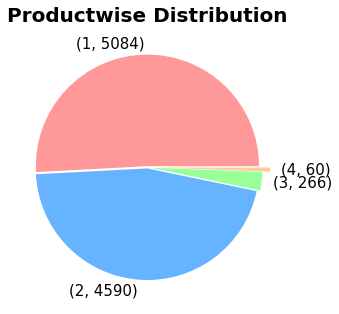

In [185]:
plt.figure(figsize=(5,7))
noofpro = data.groupby('NumOfProducts').count()['CustomerId']
lab = list(zip(noofpro.index.tolist(),noofpro.tolist()))
noofpro.plot(kind='pie',colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],explode=[0.01,0.01,0.03,0.1],labels=lab,fontsize=15)
plt.ylabel('')
plt.title('Productwise Distribution',weight='bold',fontsize=20)

Text(0.5, 1.0, 'Gender-wise Distribution')

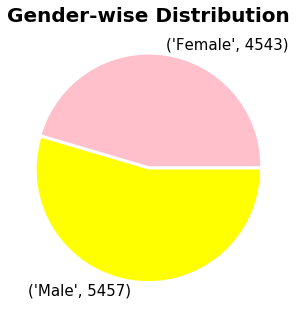

In [186]:
plt.figure(figsize=(5,7))
gen = data.groupby('Gender').count()['CustomerId']
lab = list(zip(gen.index.tolist(),gen.tolist()))
gen.plot(kind='pie',colors=['pink','yellow'],explode=[0.01,0.02],labels=lab,fontsize=15)
plt.ylabel('')
plt.title('Gender-wise Distribution',weight='bold',fontsize=20)

# Outlier Analysis

In [187]:
#Looking for outliers using quantile method
Q1 = data.EstimatedSalary.quantile(0.25)
Q3 = data.EstimatedSalary.quantile(0.75)
IQR = Q3 - Q1
low = Q1-(1.5*IQR)
up = Q3+(1.5*IQR)
print(Q1)
data[(data['EstimatedSalary']>low)&(data['EstimatedSalary']<up)].shape

51002.11


(10000, 14)

In [188]:
#Looking for outliers using quantile method
Q1 = data.Balance.quantile(0.25)
Q3 = data.Balance.quantile(0.75)
IQR = Q3 - Q1
low = Q1-(1.5*IQR)
up = Q3+(1.5*IQR)
data[(data['Balance']>low)&(data['Balance']<up)].shape

(10000, 14)

# Bivariate Analysis

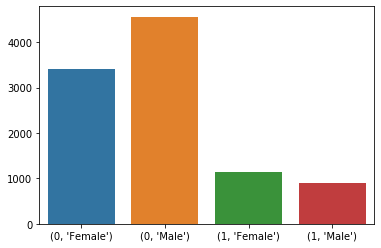

In [189]:
ind = data.groupby(['Exited','Gender']).count()['CustomerId'].index
val = data.groupby(['Exited','Gender']).count()['CustomerId'].tolist()
sns.barplot(ind,val)

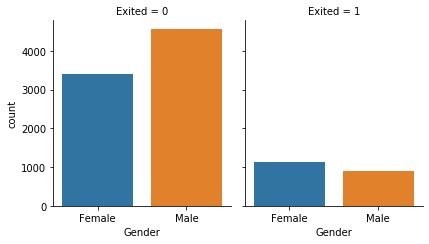

In [190]:
g = sns.catplot("Gender", col="Exited", col_wrap=4,
                data=data,
                kind="count", height=3.5, aspect=.8)

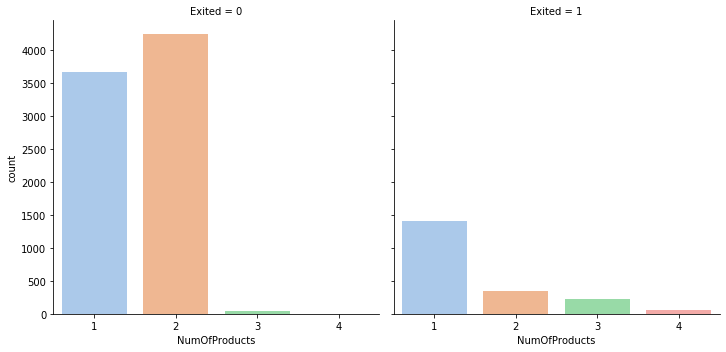

In [191]:
g = sns.catplot('NumOfProducts',col='Exited',data=data,kind='count',palette='pastel')


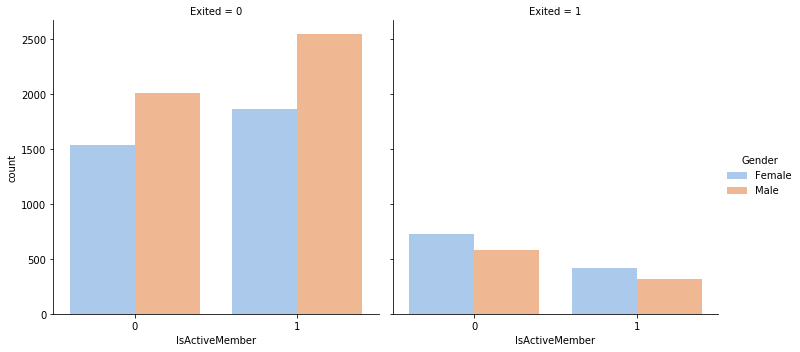

In [192]:
g = sns.catplot('IsActiveMember',col='Exited',hue='Gender',data=data,kind='count',palette='pastel')

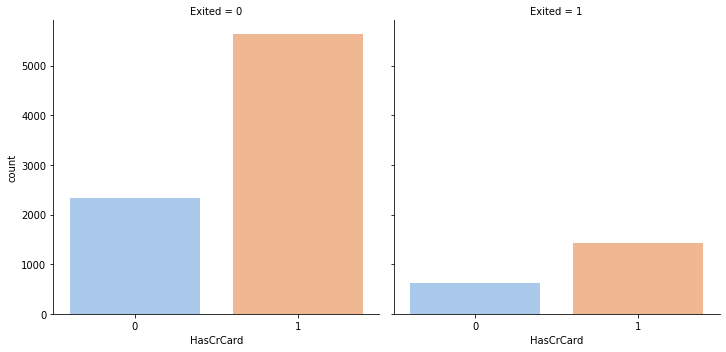

In [193]:
g = sns.catplot('HasCrCard',col='Exited',data=data,kind='count',palette='pastel')

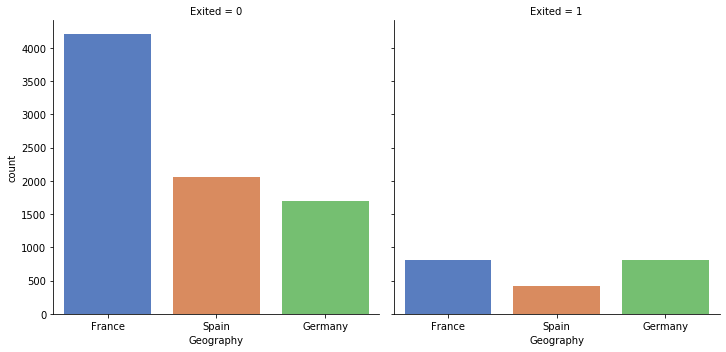

In [194]:
g = sns.catplot('Geography',col='Exited',data=data,kind='count',palette='muted',color = 'salmon')

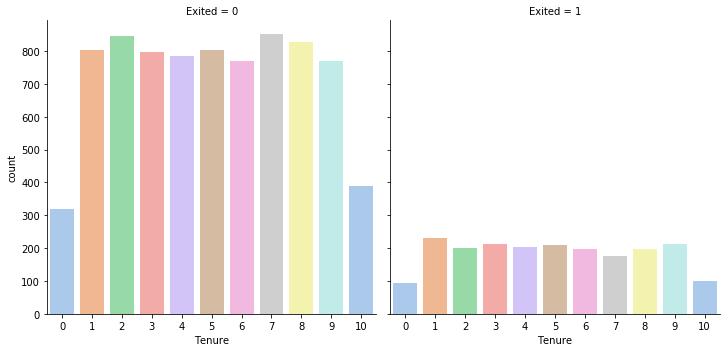

In [195]:
g = sns.catplot('Tenure',col='Exited',data=data,kind='count',palette='pastel')

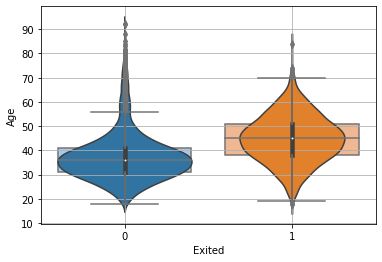

In [196]:
sns.violinplot('Exited','Age',data=data)
sns.boxplot('Exited','Age',data=data,palette='pastel')
plt.grid()

([<matplotlib.axis.YTick at 0x7f3e4d5b6f90>,
 <a list of 12 Text yticklabel objects>)

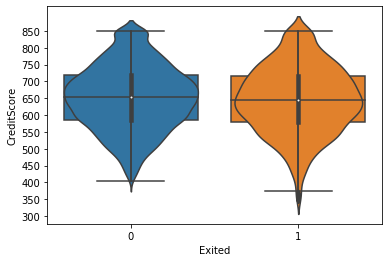

In [197]:
sns.violinplot('Exited','CreditScore',data=data)
sns.boxplot('Exited','CreditScore',data=data)
plt.yticks(range(300,900,50))

([<matplotlib.axis.YTick at 0x7f3e4d5203d0>,
 <a list of 12 Text yticklabel objects>)

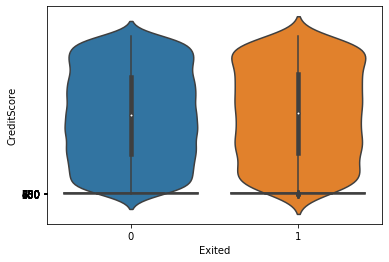

In [198]:
sns.violinplot('Exited','EstimatedSalary',data=data)
sns.boxplot('Exited','CreditScore',data=data)
plt.yticks(range(300,900,50))

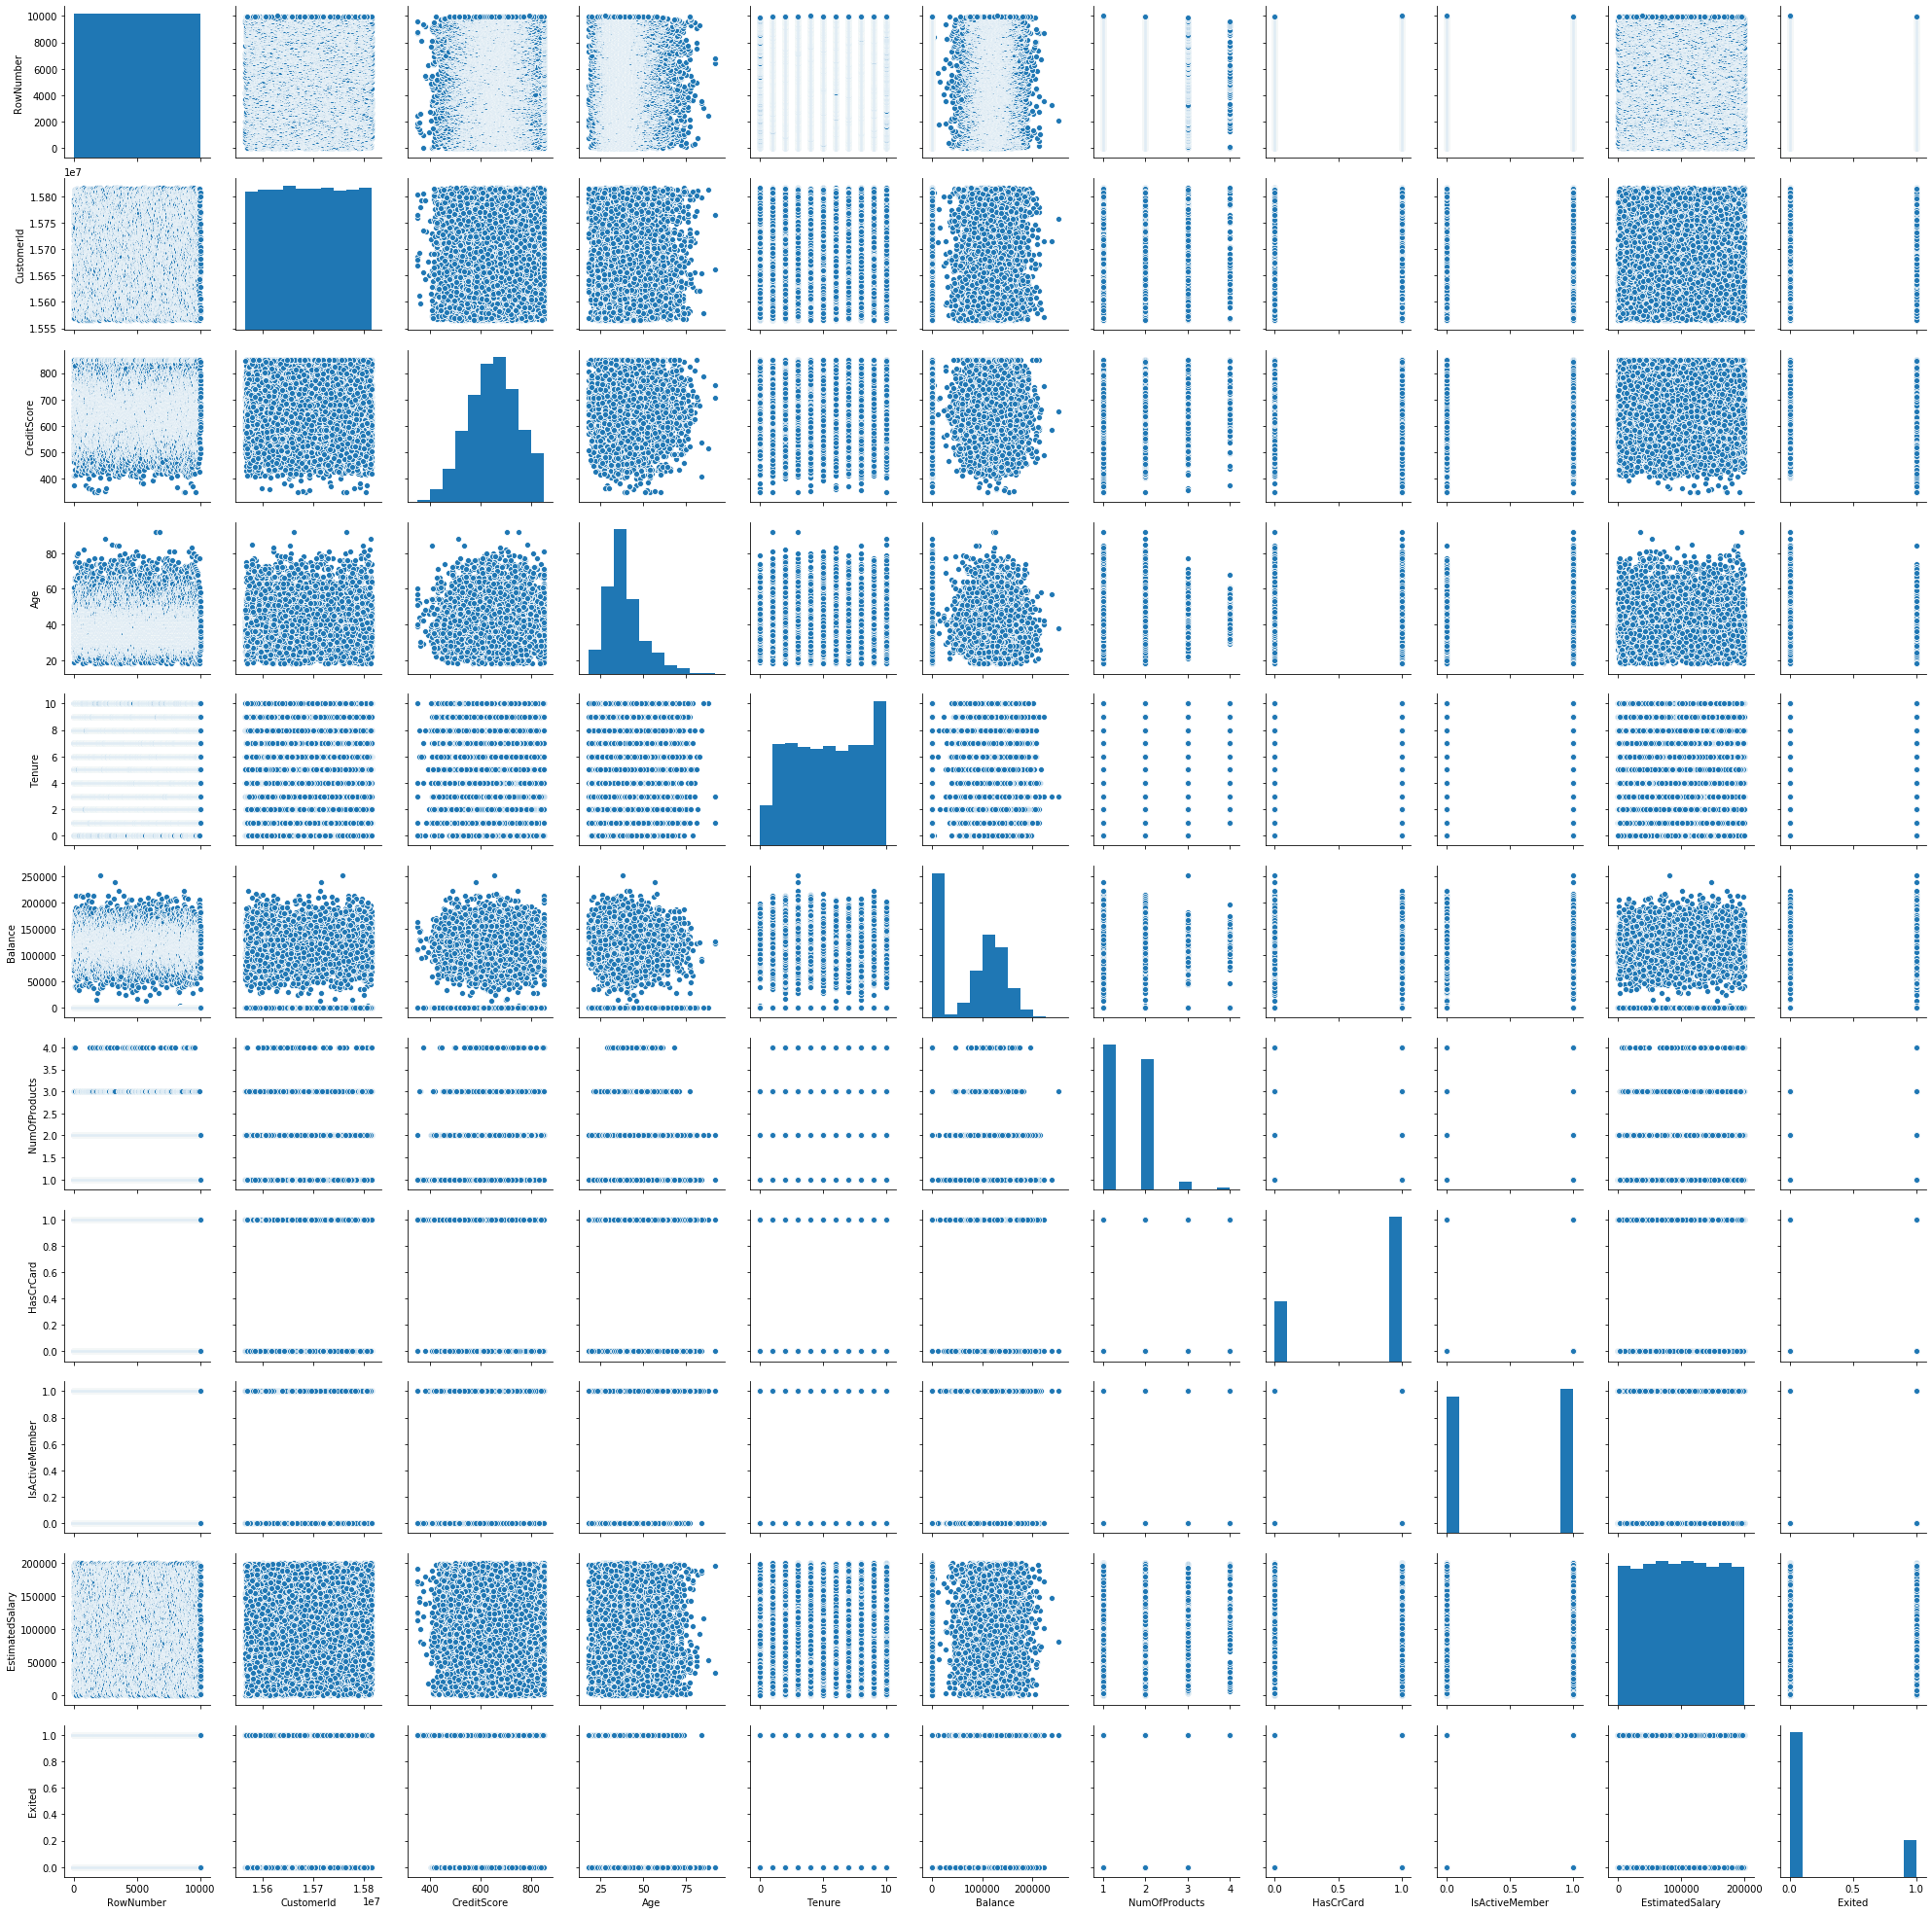

In [199]:
sns.pairplot(data)

In [200]:
#Google based Age Bucketing
#18-24, 25-34, 35-44, 45-54, 55-64, 65
for i in range(data.shape[0]):
    if(data.Age.iloc[i] in range(18,25)):
        data.Age.iloc[i]=1
    elif(data.Age.iloc[i] in range(25,35)):
        data.Age.iloc[i]=2
    elif(data.Age.iloc[i] in range(35,45)):
        data.Age.iloc[i]=3
    elif(data.Age.iloc[i] in range(45,55)):
        data.Age.iloc[i]=4
    elif(data.Age.iloc[i] in range(55,65)):
        data.Age.iloc[i]=5
    elif(data.Age.iloc[i]>64):
        data.Age.iloc[i]=6
        

/home/ananya/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [201]:
#Univariate and Bivariate Analysis of categorised Age Variable

Text(0.5, 1.0, 'Distribution of Age\n Variable along buckets')

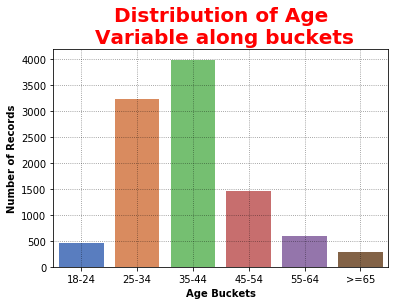

In [202]:
sns.countplot(data['Age'],palette='muted')
plt.grid(ls=':',color='black',alpha=0.5)
plt.xlabel('Age Buckets',weight='bold',fontsize=10)
plt.xticks(np.arange(6),('18-24', '25-34', '35-44', '45-54', '55-64', '>=65'))
plt.ylabel('Number of Records',weight='bold',fontsize = 10)
plt.title('Distribution of Age\n Variable along buckets',fontsize = 20,color ='red',weight = 'bold')

([<matplotlib.axis.XTick at 0x7f3e4b8abc90>,
 <a list of 6 Text xticklabel objects>)

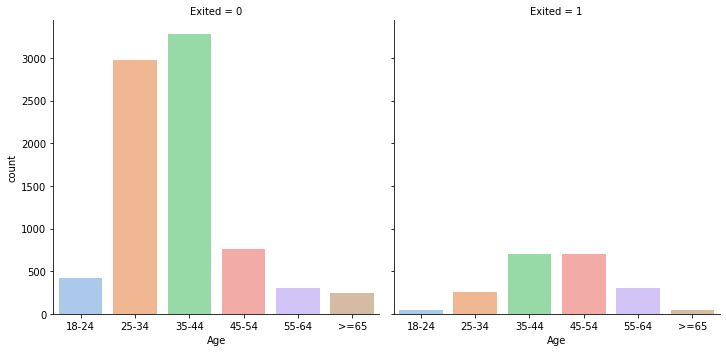

In [203]:
g = sns.catplot('Age',col='Exited',data=data,kind='count',palette='pastel')
plt.xticks(np.arange(6),('18-24', '25-34', '35-44', '45-54', '55-64', '>=65'))
#plt.title('Distribution of Age\n Variable along buckets along side the exit variable',fontsize = 20,color ='red',weight = 'bold')

In [205]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
geo_di = dict(zip(data['Geography'],le.fit_transform(data['Geography'])))
print(geo_di)
data['Geography']=le.fit_transform(data['Geography'])
le.classes_

{'France': 0, 'Spain': 2, 'Germany': 1}


array(['France', 'Germany', 'Spain'], dtype=object)

In [206]:
gen_di = dict(zip(data['Gender'].factorize()[0],data['Gender']))
print(gen_di)
data['Gender']=data['Gender'].factorize()[0]

{0: 'Female', 1: 'Male'}


In [207]:
data_train = data[[ 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [208]:
from lifelines.utils import concordance_index
from lifelines import CoxPHFitter, WeibullAFTFitter , LogNormalAFTFitter, LogLogisticAFTFitter , PiecewiseExponentialRegressionFitter
from lifelines.utils import k_fold_cross_validation


In [209]:
cph = CoxPHFitter()
result = cph.fit(data_train,duration_col = 'Tenure', event_col='Exited')


In [210]:
cph.print_summary()